<a href="https://colab.research.google.com/github/chinmaynadgir/stockpredictmlmodels/blob/main/MACD_EMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



<Figure size 1600x960 with 0 Axes>

<Figure size 1600x960 with 0 Axes>

In [154]:
stock = pd.read_csv("/content/drive/My Drive/Final-50-stocks.csv")
stock.head()

,DATE,TATASTEEL,WIPRO,TITAN,ULTRACEMO,TECHM,RELIANCE,SHREECEM,SUNPHARMA,TATAMOTORS,TCS,SBIN,NESTLEIND,NTPC,M&M,MARUTI,ONGC,POWERGRID,JSWSTEEL,KOTAKBANK,LT,ICICIBANK,INDUSBANK,INFY,IOC,ITC,HEROMOTOCO,HINDALCO,HINDUNILVR,HCLTECH,HDFCBANK,HDFC,DRREDDYS,EICHERMOTOR,GRASIM,CIPLA,COALINDIA,BPCL,BRITANNIA,ADANIPORTS,BAJAJFINSERV,BAJAJFINANCE,BHARTIARTL,AXISBANK,BAJAJ-AUTO,ASIANPAINT,UPL
0,2010-01-11,591.90,423.70,3792.50,6737.95,735.60,1093.20,2116.10,2190.70,1170.60,1053.40,3198.45,3550.40,193.20,766.50,1508.30,1319.35,215.65,1344.00,468.15,2084.05,1232.00,285.95,NaN,422.90,171.85,NaN,212.95,294.55,407.80,2349.20,710.70,1678.90,1298.55,2322.20,356.60,NaN,754.80,413.15,NaN,467.25,798.60,335.30,1513.60,1530.75,2705.05,NaN
1,2010-01-12,613.55,414.70,3781.90,5443.70,671.15,988.80,2094.10,448.65,1286.75,1081.90,3100.15,3568.05,186.35,802.50,1414.10,1286.25,187.30,1206.30,480.15,2029.30,1167.45,303.00,NaN,384.55,171.40,NaN,213.70,297.60,411.05,2367.05,697.75,1775.65,1190.40,2315.85,365.15,320.95,697.95,410.30,NaN,481.65,713.30,350.55,1424.45,1571.20,2680.40,NaN
2,2010-02-11,599.05,433.85,3818.70,6735.25,724.55,1074.85,2164.55,2190.45,1154.25,1049.45,3201.85,3552.60,193.75,757.60,1493.40,1330.40,214.60,1329.15,474.45,2133.20,1231.35,276.30,NaN,422.85,173.40,NaN,215.35,294.60,406.05,2350.35,702.80,1673.95,1326.25,2366.70,350.75,NaN,772.75,413.60,NaN,472.10,806.40,329.25,1526.60,1548.75,2792.80,NaN
3,2010-02-12,622.75,426.05,3784.20,5368.40,676.35,1011.15,2022.35,452.90,1320.15,1095.80,3099.20,3646.20,182.90,789.55,1408.85,1313.95,190.20,1187.90,488.55,2015.05,1191.15,297.15,NaN,385.70,170.90,NaN,218.75,296.95,419.25,2391.75,705.50,1787.70,1222.95,2337.80,364.95,324.85,685.80,412.45,NaN,484.35,741.85,346.10,1455.35,1574.30,2651.85,NaN
4,2010-03-11,609.60,434.70,3833.05,6858.65,732.50,1065.30,2261.40,2249.30,1185.55,1052.80,3272.60,3609.95,193.20,759.90,1496.10,1330.45,221.05,1329.85,486.05,2148.90,1238.65,279.90,NaN,423.45,175.55,NaN,218.90,296.00,406.10,2362.25,715.95,1695.40,1392.95,2401.45,347.25,NaN,765.60,415.75,NaN,480.15,799.25,328.40,1536.10,1582.35,2694.90,NaN


In [155]:
stock_TCS=stock[['DATE','TCS']]
stock_TCS

,DATE,TCS
0,2010-01-11,1053.40
1,2010-01-12,1081.90
2,2010-02-11,1049.45
3,2010-02-12,1095.80
4,2010-03-11,1052.80
...,...,...
2706,2021-10-05,3145.50
2707,2021-10-06,3216.80
2708,2021-10-08,3333.90
2709,2021-10-13,3655.20


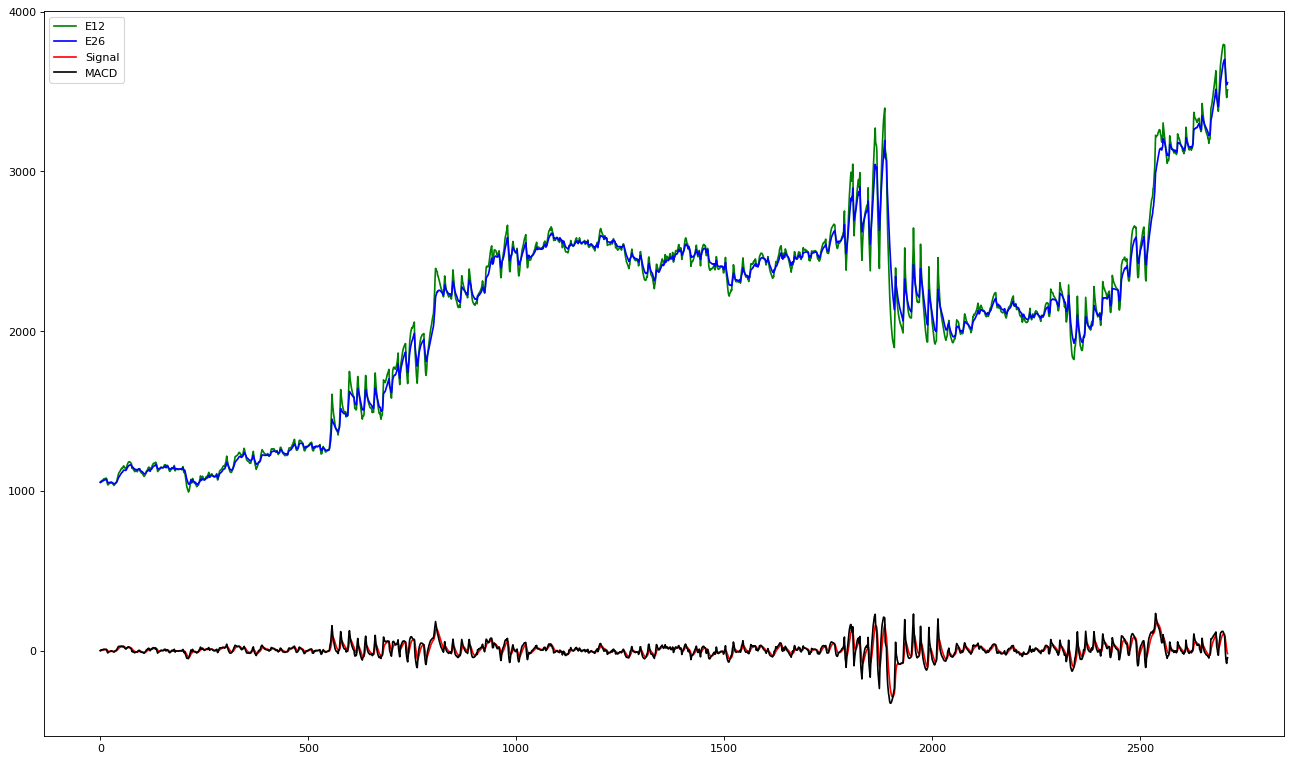

In [163]:
#EWMeans
figure(figsize=(20, 12), dpi=80)
e12=stock_TCS.TCS.ewm(span=12,adjust=False).mean()
e26=stock_TCS.TCS.ewm(span=26,adjust=False).mean()
signal=macd.ewm(span=9,adjust=False).mean()
macd=e12-e26
plt.plot(e12,label='E12',color='green')
plt.plot(e26,label='E26',color='blue')
plt.plot(e9,label='Signal',color='red')
plt.plot(macd,label='MACD',color='black')
plt.legend(loc='upper left')
plt.show()




In [181]:
UP1=[]
UP1.append(0)
for i in range(1,len(stock_TCS)):
  if stock_TCS['TCS'].values[i] > 1.01*stock_TCS['TCS'].values[i-1]:
    UP1.append(1)
  else:
    UP1.append(0)
stock_TCS.insert(len(stock_TCS.columns),"UP1",UP1)

In [ ]:
stock_TCS.insert(len(stock_TCS.columns),'E12',e12)
stock_TCS.insert(len(stock_TCS.columns),'E26',e26)
stock_TCS.insert(len(stock_TCS.columns),'SIGNAL',signal)
stock_TCS.insert(len(stock_TCS.columns),'MACD',macd)


In [182]:
stock_TCS

,DATE,TCS,E12,E26,SIGNAL,MACD,UP1
0,2010-01-11,1053.40,1053.400000,1053.400000,0.000000,0.000000,0
1,2010-01-12,1081.90,1057.784615,1055.511111,0.454701,2.273504,1
2,2010-02-11,1049.45,1056.502367,1055.062140,0.651806,1.440227,0
3,2010-02-12,1095.80,1062.548157,1058.079759,1.415124,4.468397,1
4,2010-03-11,1052.80,1061.048440,1057.688666,1.804054,3.359774,0
...,...,...,...,...,...,...,...
2706,2021-10-05,3145.50,3533.468988,3585.555387,42.975437,-52.086399,1
2707,2021-10-06,3216.80,3484.750682,3558.240173,19.682451,-73.489491,1
2708,2021-10-08,3333.90,3461.542885,3541.622382,-0.269938,-80.079497,1
2709,2021-10-13,3655.20,3491.336287,3550.035539,-11.955801,-58.699252,1


In [170]:
number = LabelEncoder()


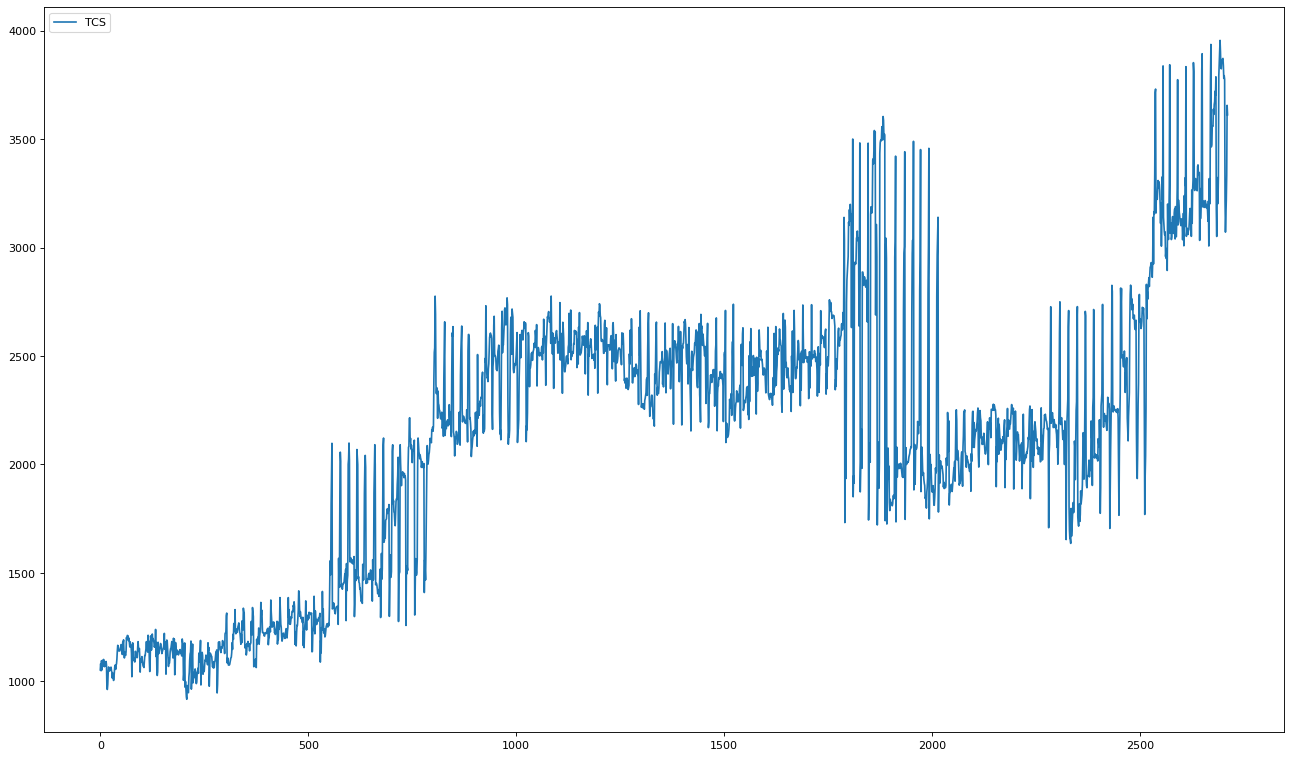

In [187]:
figure(figsize=(20, 12), dpi=80)
plt.plot(stock_TCS['TCS'],label='TCS')
plt.legend(loc='upper left')


In [192]:
features=["E12","E26","MACD","SIGNAL","TCS"]
target="UP1"

In [193]:
features_train, features_test, target_train, target_test = train_test_split(stock_TCS[features],stock_TCS[target],test_size = 0.1,random_state = 27)

In [105]:
clf= DecisionTreeClassifier(criterion='entropy')
clf.fit(features_train,target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [194]:
y_pred=clf.predict(features_test)

In [196]:
accuracy=accuracy_score(target_test,y_pred)
print(accuracy)

0.6213235294117647


In [203]:
x_axe=range(272)

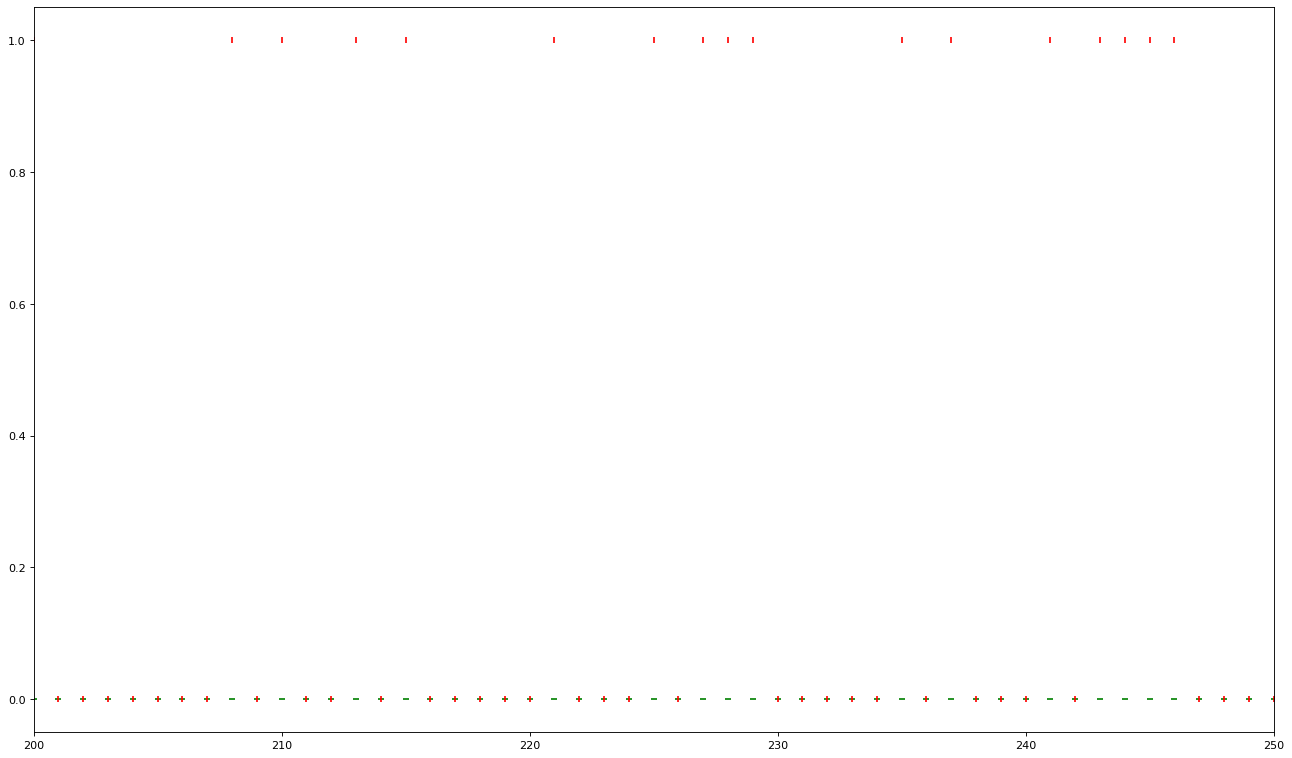

In [210]:
figure(figsize=(20,12),dpi=80)
plt.scatter(x_axe,y_pred,color='green',marker="_")
plt.scatter(x_axe,target_test,color='red',marker="|")
plt.xlim(200,250)
plt.show()


In [ ]:
#We see from the graph that this has a false positive of almost 0